# OBJECTIVE:

# To apply Logistic regression on Amazon food reviews

In [1]:
%%time
import pickle
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [2]:
#loading the data of 100k from saved file
final_100000 = openfromfile("prepocessed_data.pickle")
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


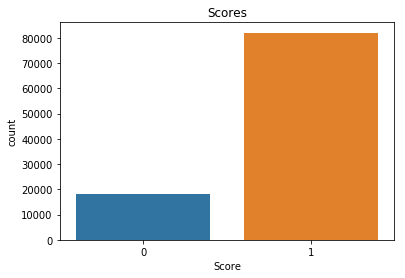

Wall time: 670 ms


In [4]:
%%time
#representing the scores data in terms of histograms 
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_100000.Score,ax=ax)
plt.title("Scores")
plt.show()

In [4]:
%%time
final_100000['Score'].value_counts()

Wall time: 4 ms


1    81998
0    18002
Name: Score, dtype: int64

In [5]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#splitting train data as train as 60% and  cross_validation as 20% and test data as 20%
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.25,shuffle=False)
print(x_tr.shape)
print(x_cv.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_cv.shape)
print(Y_test.shape)

(60000,)
(20000,)
(20000,)
(60000,)
(20000,)
(20000,)
Wall time: 2.5 s


# 1.BOW:

In [8]:
%%time
tr_bow_x = openfromfile("tr_bow_x.pickle")
cv_bow_x = openfromfile("cv_bow_x.pickle")
te_bow_x = openfromfile("te_bow_x.pickle")
print(tr_bow_x.shape)
print(cv_bow_x.shape)
print(te_bow_x.shape)

(60000, 34192)
(20000, 34192)
(20000, 34192)
Wall time: 298 ms


1.Finding the best 'C' using the maximum f1 score value and simple cross validation:

In [13]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
#taking the sample of C values(C=1/lamda)
C=[20,15,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
#finding the maximum f1 score value index which is the index of optimum C value
f1_score_cv=[]
f1_score_train=[]
for i in C:
   pred = []
   LR = LogisticRegression(penalty='l2',C=i)
   LR.fit(tr_bow_x, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,cv_bow_x.shape[0], 500):
        t = cv_bow_x[i:i+500]
        pred1 = LR.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=LR.predict(tr_bow_x)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given alpha values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given alpha values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best C using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best C index value:",a)
best_C=C[a]
print("best C value:",best_C)

list of f1 score value for given alpha values using cross validate data: [0.92793361594660417, 0.92831821186084229, 0.92857357132143403, 0.92925304376439621, 0.92849740932642499, 0.92501101483330883, 0.91198267016303725, 0.90424187979001158, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609]
----------------------------------------------------------------------------
list of f1 score value for given alpha values using train data: [0.95768461894492207, 0.95575638970566545, 0.95352924427338515, 0.94926961949768607, 0.94066359893436657, 0.93656152906434265, 0.92350627458325518, 0.91590166054046074, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626]
-----------------------------------------------------------------------------
maximum f1 score value 0.929253043764
best C index value: 3
best C value: 5


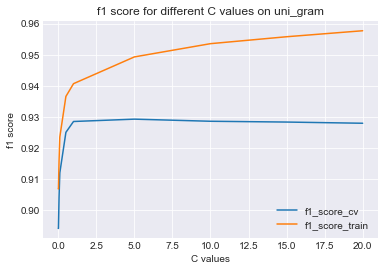

Wall time: 370 ms


In [14]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
sns.set_style("darkgrid");
plt.plot(C,f1_score_cv)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

Observation:

    1.From the above graph, model is overfitting at high C values since,cv score curve(blue line) is decreasing and train score(orange line) is high.
    
    2.And also model is underfitting at low C values since,cv score curve(blue line) is low and train score(orange line) is also low           

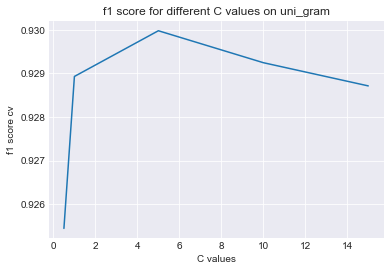

Wall time: 203 ms


In [15]:
%%time
#ploting the graph between C values and f1 score for best C.
C=[15,10,5,1,0.5]
f1_score_cv=[ 0.92871099651511813, 0.92924253093250186, 0.92997412392433754, 0.92892745795023535, 0.92544723776499327]
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.xlabel("C values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different C values on uni_gram")
plt.show()

Observation:
    From the above graph its clear that peak of the curve exists at C=5,therefore it's the hyperparameter

Confusion matrices for test data
----------------------------
test_accuracy: 88.245
precision: 0.900005837371
Recall: 0.960264075735
F1-score 0.929159008045


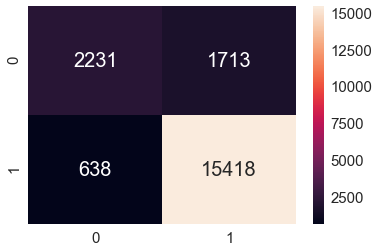

Wall time: 3.94 s


In [16]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with C value 
lr= LogisticRegression(C=5,penalty='l2')
lr.fit(tr_bow_x, y_tr)
pred = lr.predict(te_bow_x)
print("Confusion matrices for test data")
print("----------------------------")
print("test_accuracy:",accuracy_score(Y_test,pred)*100)
print("precision:",precision_score(Y_test,pred))
print("Recall:",recall_score(Y_test,pred))
print("F1-score",f1_score(Y_test,pred))
cm = pd.DataFrame(confusion_matrix(Y_test,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

Confusion matrices for train data
----------------------------
train_accuracy: 91.3583333333
precision: 0.925164489368
Recall: 0.974664469983
F1-score 0.949269619498


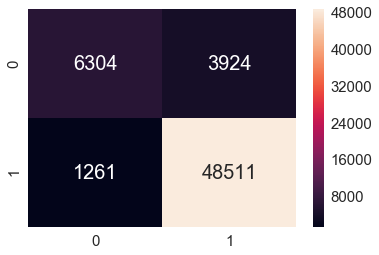

Wall time: 355 ms


In [18]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = lr.predict(tr_bow_x)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

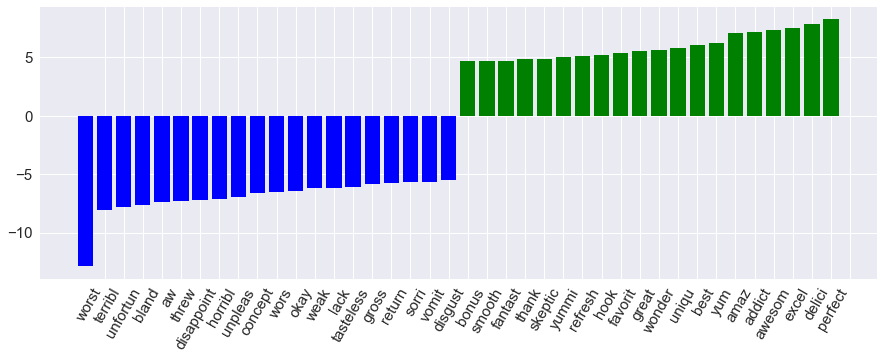

Wall time: 3.85 s


In [19]:
%%time
#ploting the important features of both positive and negative classes
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def important_features_plot(classifier, vectorizer, top_features=20):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.coef_.ravel()
 positive_coefficients = np.argsort(coefficients)[-top_features:]
 negative_coefficients = np.argsort(coefficients)[:top_features]
 top_coefficients = np.hstack([negative_coefficients,positive_coefficients])
 plt.figure(figsize=(15, 5))
 plot_color = ['blue' if i < 0 else 'green' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(1,1+2*top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
count_vect = CountVectorizer()
count_vect.fit_transform(x_tr)
important_features_plot(lr, count_vect)

Observation:

    1.From the above plot it's clear the most important negative features like worst,terrible are at left most in the plot 
    with high negative values,which are showed in blue plot.
    2.Where as most positive important positive fertures like,perfect,delici,amaz,excel are at right most in tbe plot with 
    high positive values,which are showed in green plot.
    3.So,both positive and negative features are seperated well in plots

2.Sparsity inceases as C deceases or lambda increases:

In [20]:
%%time
#C=10 or lambda = 0.1 and using the l1-regularizor
import numpy as np
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',C=10)
clf.fit(tr_bow_x, y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8768
F1-score on test data: 0.925092722077
non-zero elements: 5885
Wall time: 2.61 s


In [21]:
%%time
import numpy as np
#Using the l1-regularizor and increasing the c value, lambda = 10 note: C =0.1
clf = LogisticRegression(penalty='l1',C=0.1)
clf.fit(tr_bow_x, y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8466
F1-score on test data: 0.91128845709
non-zero elements: 183
Wall time: 816 ms


In [22]:
%%time
#C=0.01 or lambda = 100 and using the l1-regularizor
clf = LogisticRegression(penalty='l1',C=0.01)
clf.fit(tr_bow_x, y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8028
F1-score on test data: 0.890614599512
non-zero elements: 9
Wall time: 424 ms


In [23]:
%%time
#C=0.001 or lambda = 1000 and using the l1-regularizor
clf = LogisticRegression(penalty='l1',C=0.001)
clf.fit(tr_bow_x, y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8028
F1-score on test data: 0.890614599512
non-zero elements: 0
Wall time: 281 ms


Observation: As C decreases or lambda increases then sparsity is increases or number of non-zero elements are decreases.

3.Multi-collinearity test(perturbation test) for feature importance:

In [24]:
%%time
#Using C value=5 to find the Multicollinearity test 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(penalty='l2',C=5)
clf.fit(tr_bow_x, y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.88245
non-zero elements: 34192
Wall time: 2.36 s


In [25]:
%%time
from scipy.sparse import find
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print(weights1)

[ 0.00770657  0.03037874  0.01956222 ...,  0.00195894  0.04951845
  0.0029266 ]
Wall time: 5.99 ms


In [27]:
%%time
bow_t =tr_bow_x
#Random noise
Epsilon = np.random.uniform(low=-0.01, high=0.01, size=(find(bow_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
a,b,c = find(bow_t)
#Introducing random noise to non-zero datapoints
bow_t[a,b] = Epsilon + bow_t[a,b]

Wall time: 1.84 s


In [28]:
%%time
import numpy as np
clf = LogisticRegression(penalty='l2',C=5)
clf.fit(bow_t,y_tr)
pred = clf.predict(te_bow_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8824
non-zero elements: 34192
Wall time: 2.51 s


In [29]:
%%time
#Weights after adding random noise
weights2 = find(clf.coef_[0])[2]
print(weights2[:])
print(len(weights2[:]))

[ 0.00794622  0.03413558  0.02111115 ...,  0.00191145  0.02731122
  0.00281534]
34192
Wall time: 4 ms


In [30]:
%%time
#weight differences between before and after adding noise
weights_diff = abs((weights1+1.0e-6 -weights2+1.0e-6)/(weights1+1.0e-6))*100
print("weight differences:",weights_diff)
print("size of weight differences array:",weights_diff.shape)
print("weight differences with more than 30% weight difference:",weights_diff[np.where(weights_diff > 30)].size)
print("weight differences with more than 40% weight difference:",weights_diff[np.where(weights_diff > 40)].size)
print("weight differences with more than 50% weight difference:",weights_diff[np.where(weights_diff > 50)].size)

weight differences: [  3.0833712   12.35967312   7.90734386 ...,   2.52517231  44.84951273
   3.86893138]
size of weight differences array: (34192,)
weight differences with more than 30% weight difference: 1141
weight differences with more than 40% weight difference: 752
weight differences with more than 50% weight difference: 590
Wall time: 7 ms


Oservation: 1141 features of weights are greater than 30%, so collinearity exits between the features

# 2.TF-IDF:

In [32]:
%%time
tr_tfidf_x = openfromfile("tr_tfidf_x.pickle")
cv_tfidf_x = openfromfile("cv_tfidf_x.pickle")
te_tfidf_x = openfromfile("te_tfidf_x.pickle")
print(tr_tfidf_x.shape)
print(cv_tfidf_x.shape)
print(te_tfidf_x.shape)

(60000, 34192)
(20000, 34192)
(20000, 34192)
Wall time: 733 ms


1.Finding the best 'C' using maximum f1 score value and simple cross validation:

In [33]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
#taking the sample of C values(C=1/lamda)
C=[20,15,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
#finding the maximum f1 score value index which is the index of optimum C value
f1_score_cv=[]
f1_score_train=[]
for i in C:
   pred = []
   LR = LogisticRegression(penalty='l2',C=i)
   LR.fit(tr_tfidf_x, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,cv_tfidf_x.shape[0], 500):
        t = cv_tfidf_x[i:i+500]
        pred1 = LR.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting 
   predict_train=LR.predict(tr_tfidf_x)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given alpha values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given alpha values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best C using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best C index value:",a)
best_C=C[a]
print("best C value:",best_C)

list of f1 score value for given alpha values using cross validate data: [0.92497740283217844, 0.92575657301004755, 0.92691129661882166, 0.92831476823571679, 0.92898953467746703, 0.92601054481546563, 0.90879276222787664, 0.89974651104487591, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609, 0.89411114183024609]
----------------------------------------------------------------------------
list of f1 score value for given alpha values using train data: [0.96746470227133219, 0.96541290934978641, 0.96222114786932811, 0.95612054579365857, 0.94458055332293966, 0.93908220256031327, 0.92085153853304835, 0.91178816690658038, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626, 0.90682505556972626]
-----------------------------------------------------------------------------
maximum f1 score value 0.928989534677
best C index value: 4
best C value: 1


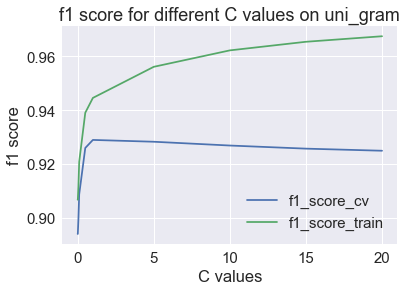

Wall time: 231 ms


In [34]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

Observation:

    1.From the above graph, model is overfitting at high C values since,cv score curve(blue line) is decreasing and train score(green line) increasing.
    
    2.And also model is underfitting at low C values since,cv score curve(blue line) is low and train score(green line) is also  low           

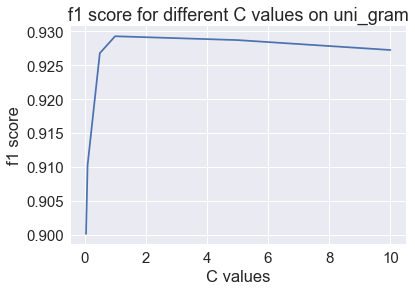

Wall time: 189 ms


In [36]:
%%time
#ploting the graph between C values and f1 score
C=[10,5,1,0.5,0.1,0.05]
f1_score_cv=[0.92724564158312206, 0.92870766327370546, 0.9292725001487121, 0.92677556957795204, 0.91026784866834987, 0.90014741831345979]
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.show()

Observation: From the above graph its clear that peak of the curve exists at C=1,therefore it's the hyperparameter

Confusion matrices for test data
----------------------------
test_accuracy: 87.77
precision: 0.888058850365
Recall: 0.969917787743
F1-score 0.927185044058


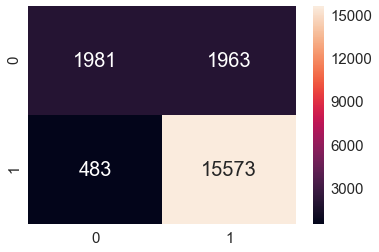

Wall time: 1.58 s


In [38]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with C value 
lr= LogisticRegression(C=1,penalty='l2')
lr.fit(tr_tfidf_x, y_tr)
pred = lr.predict(te_tfidf_x)
print("Confusion matrices for test data")
print("----------------------------")
print("test_accuracy:",accuracy_score(Y_test,pred)*100)
print("precision:",precision_score(Y_test,pred))
print("Recall:",recall_score(Y_test,pred))
print("F1-score",f1_score(Y_test,pred))
cm = pd.DataFrame(confusion_matrix(Y_test,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

Confusion matrices for train data
----------------------------
train_accuracy: 90.4616666667
precision: 0.911711374895
Recall: 0.979908382223
F1-score 0.944580553323


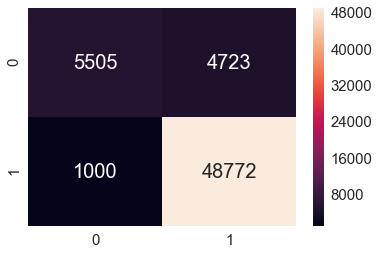

Wall time: 334 ms


In [39]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = lr.predict(tr_tfidf_x)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

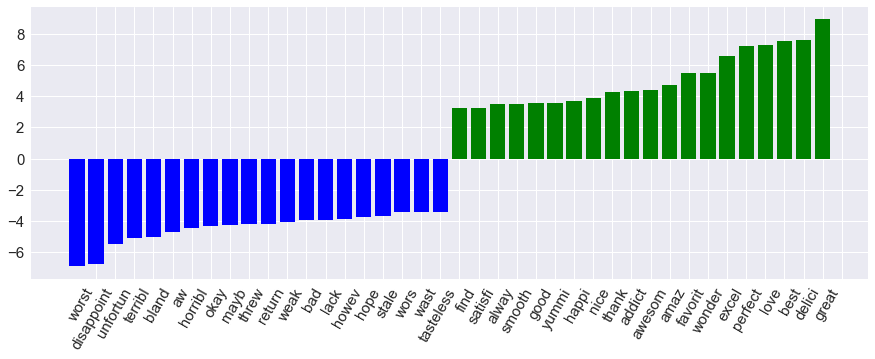

Wall time: 3.74 s


In [40]:
%%time
#ploting the important features of both positive and negative classes
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
def important_features_plot(classifier, vectorizer, top_features=20):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.coef_.ravel()
 positive_coefficients = np.argsort(coefficients)[-top_features:]
 negative_coefficients = np.argsort(coefficients)[:top_features]
 top_coefficients = np.hstack([negative_coefficients,positive_coefficients])
 plt.figure(figsize=(15, 5))
 plot_color = ['blue' if i < 0 else 'green' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(1,1+2*top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
tfidf = TfidfVectorizer()
#vectorizing the train data.
tfidf.fit_transform(x_tr)
important_features_plot(lr,tfidf)

Observation:

    1.From the above plot it's clear the most important negative features like worst,terrible are at left most in the plot 
    with high negative values,which are showed in blue plot.
    2.Where as most positive important positive fertures like,perfect,delici,amaz,excel are at right most in tbe plot with 
    high positive values,which are showed in green plot.
    3.So,both positive and negative features are seperated well in plots

2.Sparsity inceases as C deceases or lambda increases:

In [41]:
%%time
#C=10 or lambda = 0.1
import numpy as np
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',C=10)
clf.fit(tr_tfidf_x, y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.872
F1-score on test data: 0.921965494117
non-zero elements: 8362
Wall time: 3.06 s


In [42]:
%%time
import numpy as np
#Using the l1-regularizor and increasing the c value, lambda = 10 note: C =0.1
clf = LogisticRegression(penalty='l1',C=0.1)
clf.fit(tr_tfidf_x, y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.84385
F1-score on test data: 0.910168272688
non-zero elements: 183
Wall time: 702 ms


In [43]:
%%time
#C=0.01 or lambda = 100
clf = LogisticRegression(penalty='l1',C=0.01)
clf.fit(tr_tfidf_x, y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8028
F1-score on test data: 0.890614599512
non-zero elements: 3
Wall time: 341 ms


In [44]:
%%time
#C=0.001 or lambda = 1000
clf = LogisticRegression(penalty='l1',C=0.001)
clf.fit(tr_tfidf_x, y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8028
F1-score on test data: 0.890614599512
non-zero elements: 0
Wall time: 265 ms


Observation: As C decreases or lambda increases then sparsity is increases or number of non-zero elements are decreases.

3.Multi-collinearity test(perturbation test) for feature importance:

In [45]:
%%time
#Using C value=1 to find the Multicollinearity test 
import numpy as np
from scipy.sparse import find
clf = LogisticRegression(penalty='l2',C=1)
clf.fit(tr_tfidf_x, y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print("weights1:",weights1)
print("number of weights in weights1:",len(weights1))

Accuracy on test data: 0.8777
non-zero elements: 34192
weights1: [ 0.00853409  0.01716072  0.01509518 ...,  0.00307266  0.02743078
  0.00366416]
number of weights in weights1: 34192
Wall time: 1.29 s


In [46]:
%%time
tfidf_t =tr_tfidf_x
#Random noise
Epsilon = np.random.uniform(low=-0.01, high=0.01, size=(find(tfidf_t)[0].size,))
#Getting the postions(row and column) and value of non-zero datapoints 
a,b,c = find(tfidf_t)
#Introducing random noise to non-zero datapoints
tfidf_t[a,b] = Epsilon + tfidf_t[a,b]
clf = LogisticRegression(penalty='l2',C=1)
clf.fit(tfidf_t,y_tr)
pred = clf.predict(te_tfidf_x)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights after adding random noise
weights2 = find(clf.coef_[0])[2]
print("weights2:",weights2)
print("number of weights in weights2:",len(weights2))

Accuracy on test data: 0.87765
non-zero elements: 34192
weights2: [ 0.00883386  0.0159862   0.01491458 ...,  0.0029439   0.02817456
  0.00365765]
number of weights in weights2: 34192
Wall time: 3.21 s


In [47]:
%%time
#weight differences between before and after adding noise
weights_diff = abs((weights1+1.0e-6 -weights2+1.0e-6)/(weights1+1.0e-6))*100
print("weight differences:",weights_diff)
print("size of weight differences array:",weights_diff.shape)
print("weight differences with more than 30% weight difference:",weights_diff[np.where(weights_diff > 30)].size)
print("weight differences with more than 40% weight difference:",weights_diff[np.where(weights_diff > 40)].size)
print("weight differences with more than 50% weight difference:",weights_diff[np.where(weights_diff > 50)].size)

weight differences: [ 3.48868548  6.85548985  1.20954325 ...,  4.25408542  2.70409989
  0.2322999 ]
size of weight differences array: (34192,)
weight differences with more than 30% weight difference: 713
weight differences with more than 40% weight difference: 515
weight differences with more than 50% weight difference: 417
Wall time: 6.98 ms


Oservation: 713 features of weights are greater than 30%, so collinearity exits between the features

# 3.Avg-W2V:

In [49]:
%%time
#loading the Average word to vector train and test data
avg_w2v_tr = openfromfile("avg_w2v_tr.pickle")
avg_w2v_cv = openfromfile("avg_w2v_cv.pickle")
avg_w2v_te = openfromfile("avg_w2v_te.pickle")

Wall time: 271 ms


In [50]:
%%time
print(len(avg_w2v_tr))
print(len(avg_w2v_cv))
print(len(avg_w2v_te))

60000
20000
20000
Wall time: 0 ns


1.Finding the best 'C' using maximum f1 score and simple cross validation:

In [54]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
#taking the sample of C values(C=1/lamda)
C=[20,15,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
#finding the maximum f1 score value index which is the index of optimum C value
f1_score_cv=[]
f1_score_train=[]
for i in C:
   pred = []
   LR = LogisticRegression(penalty='l2',C=i)
   LR.fit(avg_w2v_tr, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,len(avg_w2v_cv), 500):
        t = avg_w2v_cv[i:i+500]
        pred1 = LR.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=LR.predict(avg_w2v_tr)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given alpha values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given alpha values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best C using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best C index value:",a)
best_C=C[a]
print("best C value:",best_C)

list of f1 score value for given alpha values using cross validate data: [0.90301595000998647, 0.90301595000998647, 0.90304724948641857, 0.90304724948641857, 0.90315585230839479, 0.90318714868605021, 0.9029533456983877, 0.90277857020596797, 0.90304187929412427, 0.90302546863426592, 0.90315430520034101, 0.90296029290721769, 0.90334360378865686, 0.90337648856722708, 0.89392076297873613]
----------------------------------------------------------------------------
list of f1 score value for given alpha values using train data: [0.92016027519674071, 0.92016027519674071, 0.92016027519674071, 0.92015143362287655, 0.92016180949910165, 0.92017218517593247, 0.92020096254526929, 0.92012178138896095, 0.91992747714474832, 0.92005287660210355, 0.91963596512126555, 0.91901194188788304, 0.91726872414647631, 0.91593784576899029, 0.90513104466592831]
-----------------------------------------------------------------------------
maximum f1 score value 0.903376488567
best C index value: 13
best C value: 5e

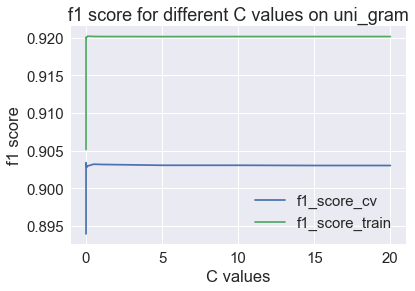

Wall time: 210 ms


In [55]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

Observation:

    1.From the above graph, model is not overfitting at high C values since,test score curve(blue line) is constant and train score(green line) is also constant.
    
    2.And also model is not underfitting at low C values since,test score curve(blue line) is constant and train score(green line) is also constant   

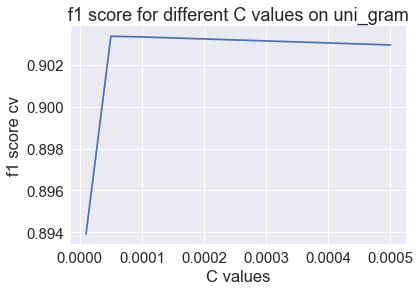

Wall time: 365 ms


In [57]:
%%time
#ploting the graph between C values and f1 score
C=[0.0005,0.0001,0.00005,0.00001]
f1_score_cv=[ 0.90296029290721769, 0.90334360378865686, 0.90337648856722708, 0.89392076297873613]
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.xlabel("C values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different C values on uni_gram")
plt.show()

Observation: From the above graph its clear that peak of the curve exists at C=5e-05,therefore it's the hyperparameter

Confusion matrices for test data
----------------------------
test_accuracy: 82.8
precision: 0.839760853172
Recall: 0.971038863976
F1-score 0.900641210791


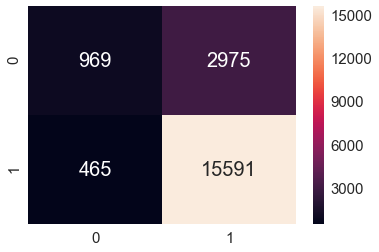

Wall time: 676 ms


In [58]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with C value 
lr= LogisticRegression(C=0.00005,penalty='l2')
lr.fit(avg_w2v_tr,y_tr)
pred = lr.predict(avg_w2v_te)
print("Confusion matrices for test data")
print("----------------------------")
print("test_accuracy:",accuracy_score(Y_test,pred)*100)
print("precision:",precision_score(Y_test,pred))
print("Recall:",recall_score(Y_test,pred))
print("F1-score",f1_score(Y_test,pred))
cm = pd.DataFrame(confusion_matrix(Y_test,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

Confusion matrices for train data
----------------------------
train_accuracy: 85.4383333333
precision: 0.878810257925
Recall: 0.95634091457
F1-score 0.915937845769


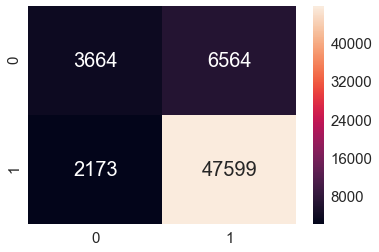

Wall time: 345 ms


In [60]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = lr.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

2.Sparsity inceases as C deceases or lambda increases:

In [61]:
%%time
#C=10 or lambda = 0.1
import numpy as np
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',C=10)
clf.fit(avg_w2v_tr, y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.82505
F1-score on test data: 0.899854031312
non-zero elements: 50
Wall time: 3.75 s


In [62]:
%%time
import numpy as np
#Using the l1-regularizor and increasing the c value, lambda = 10 note: C =0.1
clf = LogisticRegression(penalty='l1',C=0.1)
clf.fit(avg_w2v_tr, y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.82555
F1-score on test data: 0.900197374067
non-zero elements: 49
Wall time: 2.22 s


In [63]:
%%time
#C=0.01 or lambda = 100
clf = LogisticRegression(penalty='l1',C=0.01)
clf.fit(avg_w2v_tr,y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8246
F1-score on test data: 0.899817226411
non-zero elements: 42
Wall time: 888 ms


In [64]:
%%time
#C=0.001 or lambda = 1000
clf = LogisticRegression(penalty='l1',C=0.001)
clf.fit(avg_w2v_tr,y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.80915
F1-score on test data: 0.893293450001
non-zero elements: 21
Wall time: 444 ms


Observation: As C decreases or lambda increases then sparsity is increases or number of non-zero elements are decreases.

3.Multi-collinearity test(perturbation test) for feature importance:

In [65]:
%%time
#Using C value=0.00005 to find the Multicollinearity test 
import numpy as np
from scipy.sparse import find
clf = LogisticRegression(penalty='l2',C=0.00005)
clf.fit(avg_w2v_tr,y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print("weights1:",weights1)
print("number of weights in weights1:",len(weights1))

Accuracy on test data: 0.828
non-zero elements: 50
weights1: [-0.02929111 -0.08104358  0.00495335  0.08407432  0.02376184 -0.05677483
 -0.04679823 -0.02995092 -0.03139964 -0.05910671  0.02083882 -0.05958808
 -0.07048055  0.05706873 -0.0166364   0.04443525  0.03288528  0.0353781
 -0.02418083  0.01039689  0.00737054 -0.01865793  0.04594971 -0.04020313
  0.02408166  0.05981769 -0.04184428 -0.11182689  0.00704184 -0.01370065
 -0.03224158  0.0155777   0.00678208  0.02526444 -0.00808291  0.06862546
 -0.00575557 -0.00780752  0.04492431 -0.02828039 -0.0702771   0.07763959
  0.00802601  0.04152723 -0.05526361 -0.0246114  -0.02318143  0.07655444
 -0.02220308 -0.00517223]
number of weights in weights1: 50
Wall time: 472 ms


In [66]:
%%time
#Random noise
Epsilon = np.random.uniform(low=-10, high=10, size=(find(avg_w2v_tr)[0].size,))
#Introducing random noise to non-zero datapoints
avg_w2v_tr = (Epsilon[0:60000])[:50] + avg_w2v_tr
clf = LogisticRegression(penalty='l2',C=0.00005)
clf.fit(avg_w2v_tr,y_tr)
pred = clf.predict(avg_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights after adding random noise
weights2 = find(clf.coef_[0])[2]
print("weights2:",weights2)
print("number of weights in weights2:",len(weights2))

Accuracy on test data: 0.6322
non-zero elements: 50
weights2: [-0.03110615 -0.08033404  0.02693268  0.08070039  0.0629488  -0.04767482
 -0.08491165 -0.02804225 -0.02170534 -0.07210808  0.02292803 -0.10596948
 -0.10598371  0.05513401 -0.04352245  0.0719662   0.06102876  0.03865822
 -0.01038717  0.02210374 -0.01507075 -0.00258007  0.03742368 -0.05223088
  0.0097043   0.10382513 -0.03988224 -0.14987002 -0.0122084  -0.01103516
 -0.03556796  0.00246204 -0.00314352  0.06146926  0.00229009  0.06340896
 -0.00152099 -0.00607969  0.07121007 -0.04388062 -0.10596708  0.0804436
  0.03301825  0.03201442 -0.07521566 -0.01189236 -0.02151084  0.08831428
 -0.04146797 -0.02812229]
number of weights in weights2: 50
Wall time: 1.14 s


In [67]:
%%time
#weight differences between before and after adding noise
weights_diff = abs((weights1+1.0e-6 - weights2+1.0e-6)/(weights1+1.0e-6))*100
print("weight differences:",weights_diff)
print("size of weight differences array:",weights_diff.shape)
print("weight differences with more than 30% weight difference:",weights_diff[np.where(weights_diff > 30)].size)
print("weight differences with more than 40% weight difference:",weights_diff[np.where(weights_diff > 40)].size)
print("weight differences with more than 50% weight difference:",weights_diff[np.where(weights_diff > 50)].size)

weight differences: [   6.20359457    0.87304988  443.59638446    4.01535795  164.90010843
   16.02500429   81.44802184    6.36618352   30.86852934   22.00019482
   10.0154979    77.84136667   50.37654082    3.39360735  161.63158705
   61.95156433   85.57207684    9.26567248   57.03788453  112.56954093
  304.45852633   86.16561657   18.5590774    29.92314633   59.70836517
   73.56471119    4.68423848   34.02175566  273.35896742   19.44200954
   10.32356167   84.2025657   146.35822223  143.2899283   128.32368291
    7.60420854   73.55166114   22.10755259   58.50544411   55.17175925
   50.78822726    3.60895354  311.3270508    22.91166745   36.10770255
   51.67344818    7.19826422   15.35859391   86.77965237  443.84108891]
size of weight differences array: (50,)
weight differences with more than 30% weight difference: 30
weight differences with more than 40% weight difference: 27
weight differences with more than 50% weight difference: 27
Wall time: 3.99 ms


Oservation: 30 features of weights are greater than 30%, so collinearity exits between the features

# 4.Tf-idf- W2V:

In [68]:
%%time
#loading the tfidf word to vector train and test data
tfidf_w2v_tr = openfromfile("tfidf_w2v_tr.pickle")
tfidf_w2v_cv = openfromfile("tfidf_w2v_cv.pickle")
tfidf_w2v_te = openfromfile("tfidf_w2v_te.pickle")

Wall time: 91.9 ms


In [69]:
%%time
print(len(tfidf_w2v_tr))
print(len(tfidf_w2v_cv))
print(len(tfidf_w2v_te))

60000
20000
20000
Wall time: 0 ns


1.Finding the best 'C' using maximum f1 score value and simple cross validation:

In [70]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
#taking the sample of C values(C=1/lamda)
C=[20,15,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
#finding the maximum f1 score value index which is the index of optimum C value
f1_score_cv=[]
f1_score_train=[]
for i in C:
   pred = []
   LR = LogisticRegression(penalty='l2',C=i)
   LR.fit(tfidf_w2v_tr, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,len(avg_w2v_cv), 500):
        t = tfidf_w2v_cv[i:i+500]
        pred1 = LR.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=LR.predict(tfidf_w2v_tr)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given alpha values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given alpha values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best C using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best C index value:",a)
best_C=C[a]
print("best C value:",best_C)

list of f1 score value for given alpha values using cross validate data: [0.90605657430439057, 0.90605657430439057, 0.90605657430439057, 0.90605657430439057, 0.90608821402747652, 0.90608821402747652, 0.9061207968311793, 0.90603774675568649, 0.90503244412400863, 0.9046754818079682, 0.90380377228884634, 0.90307854717680969, 0.90056285178236406, 0.90062821245002855, 0.89781425536249582]
----------------------------------------------------------------------------
list of f1 score value for given alpha values using train data: [0.91523003550723947, 0.91523003550723947, 0.91523003550723947, 0.91524036173250822, 0.91522132317943838, 0.91521099677293449, 0.91521519806597751, 0.9152123023047789, 0.91491605620956018, 0.91488352682297602, 0.91429594519463642, 0.91312880900733384, 0.91133171005806324, 0.91037336593623619, 0.90587219343696024]
-----------------------------------------------------------------------------
maximum f1 score value 0.906120796831
best C index value: 6
best C value: 0.1
W

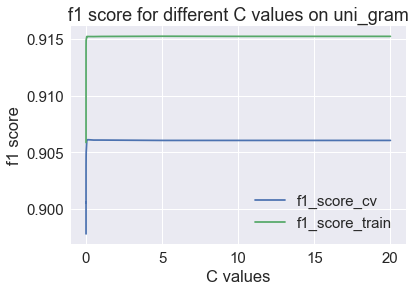

Wall time: 195 ms


In [71]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.plot(C,f1_score_train)
plt.xlabel("C values")
plt.ylabel("f1 score")
plt.title("f1 score for different C values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

Observation:

1.From the above graph, model is not overfitting at high C values since,test score curve(blue line) is constant and train score(green line) is also constant.

2.And also model is not underfitting at low C values since,test score curve(blue line) is constant and train score(green line) is also constant   

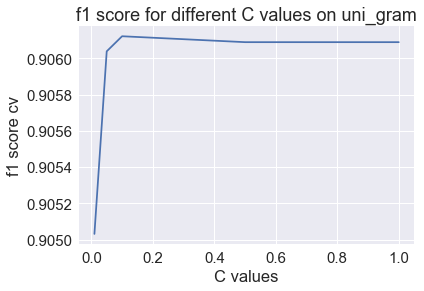

Wall time: 186 ms


In [74]:
%%time
#ploting the graph between C values and f1 score
C=[1,0.5,0.1,0.05,0.01]
f1_score_cv=[ 0.90608821402747652, 0.90608821402747652, 0.9061207968311793, 0.90603774675568649, 0.90503244412400863,]
sns.set_style("darkgrid")
plt.plot(C,f1_score_cv)
plt.xlabel("C values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different C values on uni_gram")
plt.show()

Observation: From the above graph its clear that peak of the curve exists at C=0.1,therefore it's the hyperparameter

Confusion matrices for test data
----------------------------
test_accuracy: 83.3
precision: 0.845618612742
Recall: 0.968858993523
F1-score 0.903053523743


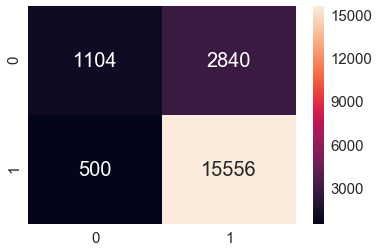

Wall time: 2.05 s


In [83]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on test data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with C value
lr= LogisticRegression(C=0.1,penalty='l2')
lr.fit(tfidf_w2v_tr,y_tr)
pred = lr.predict(tfidf_w2v_te)
print("Confusion matrices for test data")
print("----------------------------")
print("test_accuracy:",accuracy_score(Y_test,pred)*100)
print("precision:",precision_score(Y_test,pred))
print("Recall:",recall_score(Y_test,pred))
print("F1-score",f1_score(Y_test,pred))
cm = pd.DataFrame(confusion_matrix(Y_test,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

Confusion matrices for train data
----------------------------
train_accuracy: 84.9785714286
precision: 0.867312559194
Recall: 0.965951928065
F1-score 0.91397858259


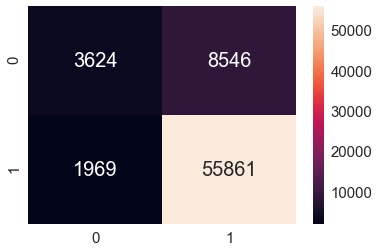

Wall time: 543 ms


In [73]:
%%time
#Using optimal C value to find accuracy,precision,recall,f1_score on train data
pred = lr.predict(tfidf_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(Y_train,pred)*100)
print("precision:",precision_score(Y_train,pred))
print("Recall:",recall_score(Y_train,pred))
print("F1-score",f1_score(Y_train,pred))
cm = pd.DataFrame(confusion_matrix(Y_train,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

2.Sparsity inceases as C deceases or lambda increases:

In [78]:
%%time
#C=10 or lambda = 0.1
import numpy as np
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',C=10)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.83315
F1-score on test data: 0.903098411592
non-zero elements: 50
Wall time: 2.96 s


In [79]:
%%time
import numpy as np
#Using the l1-regularizor and increasing the c value, lambda = 10 note: C =0.1
clf = LogisticRegression(penalty='l1',C=0.1)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8321
F1-score on test data: 0.902587607333
non-zero elements: 50
Wall time: 2.86 s


In [80]:
%%time
#C=0.01 or lambda = 100
clf = LogisticRegression(penalty='l1',C=0.01)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.8287
F1-score on test data: 0.901233856089
non-zero elements: 43
Wall time: 1.21 s


In [81]:
%%time
#C=0.001 or lambda = 1000
clf = LogisticRegression(penalty='l1',C=0.001)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("F1-score on test data:",f1_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))

Accuracy on test data: 0.80645
F1-score on test data: 0.89194696441
non-zero elements: 21
Wall time: 487 ms


Observation: As C decreases or lambda increases then sparsity is increases or number of non-zero elements are decreases.

3.Multi-collinearity test(perturbation test) for feature importance:

In [84]:
%%time
#Using C value=0.1 to find the Multicollinearity test 
import numpy as np
from scipy.sparse import find
clf = LogisticRegression(penalty='l2',C=0.1)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights before adding random noise
weights1 = find(clf.coef_[0])[2]
print("weights1:",weights1)
print("number of weights in weights1:",len(weights1))

Accuracy on test data: 0.833
non-zero elements: 50
weights1: [-0.16255305 -0.28585791 -0.14914875  0.33495898 -0.03885939 -0.4154981
 -0.02353504 -0.18487441 -0.06212599 -0.28136951  0.07760488 -0.12918284
 -0.48967489  0.29522454  0.10892637  0.15021665  0.1415792   0.02105912
 -0.08480399 -0.02160398  0.06962145 -0.34569612  0.23430193 -0.11830579
  0.13578103  0.10647007 -0.43053632 -0.77805397  0.04622438 -0.1536393
  0.24199394  0.25072706  0.04192795 -0.14863971 -0.17697869  0.29898575
 -0.02966087 -0.32096969  0.40150587 -0.23039284 -0.51822387  0.63259041
 -0.23134433 -0.21488549 -0.20364501 -0.39983673 -0.00509239  0.42372427
 -0.21754292  0.04164298]
number of weights in weights1: 50
Wall time: 1.69 s


In [85]:
%%time
#Random noise
Epsilon = np.random.uniform(low=-10, high=10, size=(find(tfidf_w2v_tr)[0].size,))
#Introducing random noise to non-zero datapoints
tfidf_w2v_tr = (Epsilon[0:60000])[:50] + tfidf_w2v_tr
clf = LogisticRegression(penalty='l2',C=0.05)
clf.fit(tfidf_w2v_tr, y_tr)
pred = clf.predict(tfidf_w2v_te)
print("Accuracy on test data:",accuracy_score(Y_test,pred))
print("non-zero elements:",np.count_nonzero(clf.coef_))
#Weights after adding random noise
weights2 = find(clf.coef_[0])[2]
print("weights2:",weights2)
print("number of weights in weights2:",len(weights2))

Accuracy on test data: 0.6188
non-zero elements: 50
weights2: [-0.16773875 -0.28034268 -0.14869859  0.35014446 -0.03528704 -0.39064967
 -0.02322723 -0.18265133 -0.06447614 -0.30036853  0.08753527 -0.14631855
 -0.49567209  0.29218013  0.0815509   0.14794889  0.15132983  0.03273516
 -0.08093357 -0.03433652  0.05896166 -0.32910452  0.23763879 -0.12519128
  0.12535463  0.09906639 -0.40494283 -0.77142898  0.04162715 -0.14567634
  0.2371633   0.25943647  0.04259136 -0.14986068 -0.16195313  0.29853478
 -0.0400825  -0.30017663  0.39413396 -0.22478482 -0.51328794  0.6104785
 -0.22438276 -0.20570212 -0.21523705 -0.39834766 -0.02330565  0.42691111
 -0.20975334  0.04264477]
number of weights in weights2: 50
Wall time: 2.49 s


In [86]:
%%time
#weight differences between before and after adding noise
weights_diff = abs((weights1+1.0e-6 - weights2)/(weights1+1.0e-6))*100
print("weight differences:",weights_diff)
print("size of weight differences array:",weights_diff.shape)
print("weight differences with more than 30% weight difference:",weights_diff[np.where(weights_diff > 30)].size)
print("weight differences with more than 40% weight difference:",weights_diff[np.where(weights_diff > 40)].size)
print("weight differences with more than 50% weight difference:",weights_diff[np.where(weights_diff > 50)].size)

weight differences: [  3.19079332e+00   1.92901660e+00   3.01149945e-01   4.53322114e+00
   9.19067637e+00   5.98016933e+00   1.30367034e+00   1.20194783e+00
   3.78455245e+00   6.75271711e+00   1.27946342e+01   1.32655710e+01
   1.22493873e+00   1.03155519e+00   2.51327769e+01   1.51030978e+00
   6.88629247e+00   5.54367158e+01   4.56283626e+00   5.89434402e+01
   1.53122848e+01   4.79920108e+00   1.42373800e+00   5.82097408e+00
   7.67951089e+00   6.95463504e+00   5.94434323e+00   8.51354484e-01
   9.94740794e+00   5.18227654e+00   1.99658695e+00   3.47325119e+00
   1.57983268e+00   8.22107878e-01   8.48952270e+00   1.51168102e-01
   3.51405146e+01   6.47790866e+00   1.83630991e+00   2.43368846e+00
   9.52279755e-01   3.49560652e+00   3.00876142e+00   4.27316392e+00
   5.69279963e+00   3.72171107e-01   3.57745920e+02   7.51864168e-01
   3.58026346e+00   2.40322040e+00]
size of weight differences array: (50,)
weight differences with more than 30% weight difference: 4
weight difference

Oservation: 4 features of weights are greater than 30%, so collinearity exits between the features

# Summary:

**Logistic regression with different text classifications:**
**Below values are for test data**    

|          |sample size|Optimal_lambda(1/C)|              |              |              |            |                            
|----------|-----------|-------------------|--------------|--------------|--------------|------------| 
|          |           |                   |Accuracy      |Precision     |Recall        |F1-score    |
|BOW       |  100k     |1/5=0.2            |   88.24%     |    0.900     |    0.960     |  0.929     |
|TF-IDF    |  100k     |1/1=1.0            |   87.77%     |    0.888     |    0.969     |  0.927     |
|Avg-W2V   |  100k     |1/0.00005=20,000   |   82.88%     |    0.839     |    0.971     |  0.900     |
|TF-IDF W2V|  100k     |1/0.1=10           |   83.33%     |    0.845     |    0.968     |  0.903     |
    

Step by step procedure:

    1.Firstly 100k rows were taken and splitted into 60:20:20 as 60k rows for train data,20k rows for cv data and 20k rows for test data.    
    2.Then converted these train,cv and test data into vectors by using Bag of words,Tfidf,Avg word 2 vec and   Tfidf word 2 vec.
    3.Now applied Logistic Regression for the trained data to find the optimum C value using simle cross validation.
    4.This is done with finding the maximum f1 score value.And then found test and cv f1 scores 
    5.Using the obtained C value found the metrics for both train and test data.And then found important features for both positive and negative classes.
    6.Then checked how sparsity varies with C and Lambda and found that as C decreases or lambda increases then sparsity is     increases or number of non-zero elements are decreases.
    7.Later found perturbation test for feature importance.